## 1. 계산에 필요한 함수, 물리량, 인자값을 선언

In [28]:
import math
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

pi = np.pi
h = 6.62e-34
k_b = 1.38e-23
elctro = 1.60217646e-19

negative_mass = 1.08
positive_mass = 0.56
electron_mass = 9.11e-31

temper = [77.8, 100, 120.75, 137.5, 148.4, 169.7, 195, 199.5, 
            213, 239, 256.5, 270.6, 281, 300, 319.5, 340.5]
n_i = [5.0e-20, 2.0e-10, 3.4e-6, 4.6e-3, 0.21, 84, 1.78e+4, 4.3e+4,
       4.16e+5, 1.92e+7, 1.45e+8, 6.7e+8, 1.79e+9, 9.7e+9, 4.51e+10, 1.89e+11]

plt.rcParams["figure.figsize"] = (6, 10)
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.color'] = 'darkred'
plt.rcParams['axes.grid'] = True 

# Nc와 Nv를 곱하는 함수
def coefficient ():
    m_n = negative_mass * electron_mass
    m_p = positive_mass * electron_mass
    coefficient1 = 2 * ((2 * pi * m_n * k_b) / h**2)**(3/2)
    coefficient2 = 2 * ((2 * pi * m_p * k_b) / h**2)**(3/2)
    result = np.log(coefficient1*coefficient2) / np.log(10)
    return result

# n_i 테이블과 temper 테이블을 받아 계산
def calculator(n_i, temper):
    
    log_n_i = 2 * 1000 * np.log(n_i) / np.log(10)
    constant = 1000 * coefficient()
    reciprocal_T = []
    for i in range (16):
        
        # 식을 정리하면 식의 기울기가 음수이다.
        # 그래서 -1를 다시 곱하여 계산하기 편리하도록 양수 기울기로 바꾸어줌
        reciprocal_T.append(1000/temper[i])
        
    axis_X = reciprocal_T
    axis_Y = log_n_i 
    
    return axis_X, axis_Y

## 2. log(n_i, base = 1)과 1000/T의 관계를 Plot

[-19.30103     -9.69897     -5.46852108  -2.33724217  -0.67778071
   1.92427929   4.25042      4.63346846   5.61909333   7.28330123
   8.161368     8.8260748    9.25285303   9.98677173  10.65417654
  11.2764618 ]
[12.85347044 10.          8.2815735   7.27272727  6.73854447  5.89275192
  5.12820513  5.01253133  4.69483568  4.18410042  3.89863548  3.6954915
  3.55871886  3.33333333  3.12989045  2.93685756]


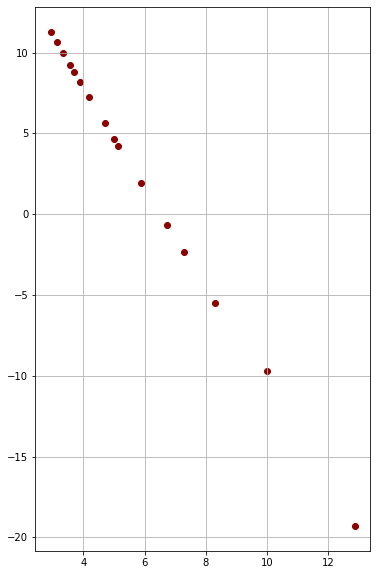

In [29]:
log_n_i = np.log(n_i) / np.log(10)
recip_T = 1000 * np.reciprocal(temper)
    
print(log_n_i)
print(recip_T)
plt.scatter(recip_T, log_n_i, color = "darkred")
plt.show()

## 3. n_i와 temper 테이블에 의한 산점도 표현
### ni^2 = NcNv * exp(-Eg / kT) 공식에 log10( )를 씌워서 계산
### 기울기는 -Eg * log(e, 10) / Kb

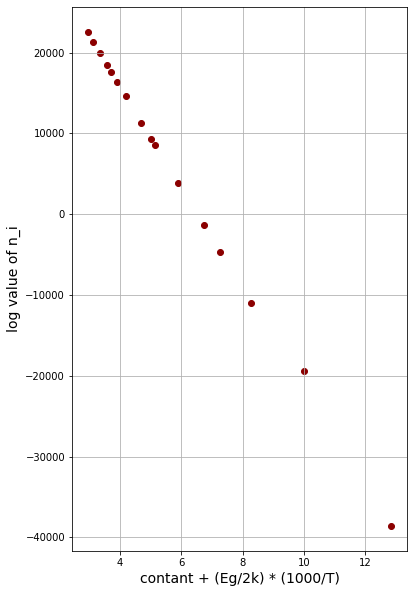

In [31]:
axis_X, axis_Y = calculator(n_i, temper)

plt.ylabel("log value of n_i", FontSize = 14)
plt.xlabel("contant + (Eg/2k) * (1000/T)", FontSize = 14)
plt.scatter(axis_X, axis_Y, color = "darkred")
plt.show()

## 4. 사이킷런 프레임워크로 선형회귀 연산

In [32]:
axis_X = np.reshape(axis_X, (16, 1))
axis_Y = np.reshape(axis_Y, (16, 1))
lr = LinearRegression()
lr.fit(axis_X, axis_Y)


# 에너지갭은 추측한 기울기에서 알 수 있다.
# 선형회귀의 기울기는 Eg * log(e, 10) / kb 이고 Eg를 알기 위헤서 kb와 log (e, 10을 이항하여 계산한다.
enegy_gap = -1 * lr.coef_ * k_b * np.log(10)
print("선형 회귀식의 기울기와 절편             : ", lr.coef_[0][0], lr.intercept_[0])
print("표에서의 에너지 갭은 Eg (단위는 줄)     : ", enegy_gap[0][0])
print("따라서 전자볼트로 환산하면 (단위는 eV)  : ", str(enegy_gap[0][0]/elctro))

선형 회귀식의 기울기와 절편             :  -6101.673308219655 40103.26503525065
표에서의 에너지 갭은 Eg (단위는 줄)     :  1.9388478362520214e-19
따라서 전자볼트로 환산하면 (단위는 eV)  :  1.21013376781982


## 5. 테이블 데이터와 선형회귀를 동시에 플롯

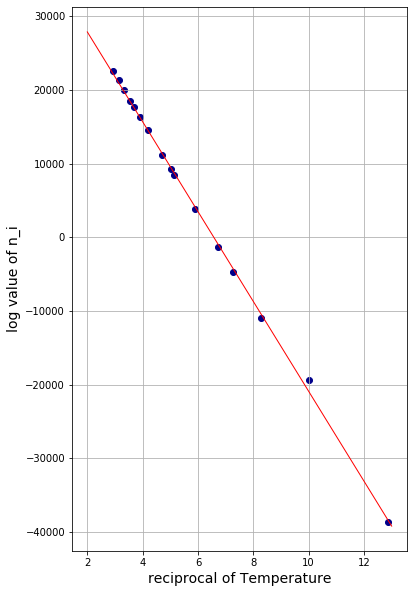

In [33]:
t = np.linspace(2., 13.0, 100)
y = lr.coef_[0] * t + lr.intercept_[0]

plt.ylabel("log value of n_i", FontSize = 14)
plt.xlabel("reciprocal of Temperature", FontSize = 14)
plt.scatter(axis_X, axis_Y, color = "darkblue")
plt.plot(t, y, color = "red")
plt.show()